### Pre-Model
--> based on selected points of carboniferous and the two most important faults (E_Affenadou and E_MasDieu)

In [7]:
import sys
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')
sys.path.append('C:\\Users\\elisa\\Documents\\git\\mplstereonet')

import gempy as gp
import vtk

import numpy as np
import matplotlib.pyplot as plt
#import evtk
import pandas as pn
%matplotlib inline

In [8]:
geo_data = gp.create_data([777000,794000,6345000,6350600,-1500,500],[100,100,100],
                        path_i = "C:\\Users\\elisa\\Documents\\git\\gempy\\notebooks\\prototype_notebooks\\input_data\\Ales_Interfaces_Carbfiltered.csv",
                        path_o = "C:\\Users\\elisa\\Documents\\git\\gempy\\notebooks\\prototype_notebooks\\input_data\\Ales_Orientations_Carbfiltered.csv")

In [9]:
'''#this is for 2 formations and 2 faults
gp.set_series(geo_data,{"fault1":('E_MasDieu'), "fault2":('E_Affenadou'), "Carb":('CARBO'), "basement":('SOCLE')})
order_series = (['E_MasDieu','E_Affenadou','CARBO','SOCLE'])
order_formations = (["fault1","fault2","Carb","basement"])'''

'#this is for 2 formations and 2 faults\ngp.set_series(geo_data,{"fault1":(\'E_MasDieu\'), "fault2":(\'E_Affenadou\'), "Carb":(\'CARBO\'), "basement":(\'SOCLE\')})\norder_series = ([\'E_MasDieu\',\'E_Affenadou\',\'CARBO\',\'SOCLE\'])\norder_formations = (["fault1","fault2","Carb","basement"])'

In [10]:
'''#this is for 1 formation (Socle) and 2 faults 
gp.set_series(geo_data,{"fault1":('E_MasDieu'), "fault2":('E_Affenadou'), "basement":('SOCLE')})
order_series = (['E_MasDieu','E_Affenadou','SOCLE'])
order_formations = (["fault1","fault2","basement"])'''

'#this is for 1 formation (Socle) and 2 faults \ngp.set_series(geo_data,{"fault1":(\'E_MasDieu\'), "fault2":(\'E_Affenadou\'), "basement":(\'SOCLE\')})\norder_series = ([\'E_MasDieu\',\'E_Affenadou\',\'SOCLE\'])\norder_formations = (["fault1","fault2","basement"])'

In [11]:
#this is for 1 formation (Carbon) and 2 faults (use this for "Carbfiltered" input data)
gp.set_series(geo_data,{"fault1":('E_MasDieu'), "fault2":('E_Affenadou'), "Carb":('CARBO')})
order_series = (['E_MasDieu','E_Affenadou','CARBO'])
order_formations = (["fault1","fault2","Carb"])

In [12]:
'''#this is only for the faults
gp.set_series(geo_data,{"fault1":('E_MasDieu'), "fault2":('E_Affenadou')})
order_series = (['E_MasDieu','E_Affenadou'])
order_formations = (["fault1","fault2"])'''

'#this is only for the faults\ngp.set_series(geo_data,{"fault1":(\'E_MasDieu\'), "fault2":(\'E_Affenadou\')})\norder_series = ([\'E_MasDieu\',\'E_Affenadou\'])\norder_formations = (["fault1","fault2"])'

In [13]:
geo_data.get_data('orientations')['formation'].value_counts()

CARBO          193
E_Affenadou      5
E_MasDieu        4
basement         0
Name: formation, dtype: int64

In [14]:
gp.interactive_df_open(geo_data, 'orientations')

A Jupyter Widget

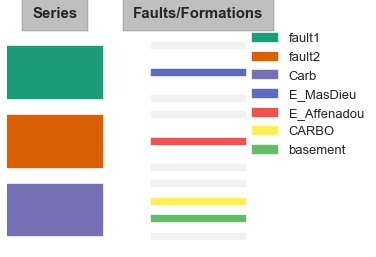

In [15]:
gp.get_sequential_pile(geo_data)

C:\Users\elisa\Documents\git\gempy\gempy\gempy_front.py:866: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


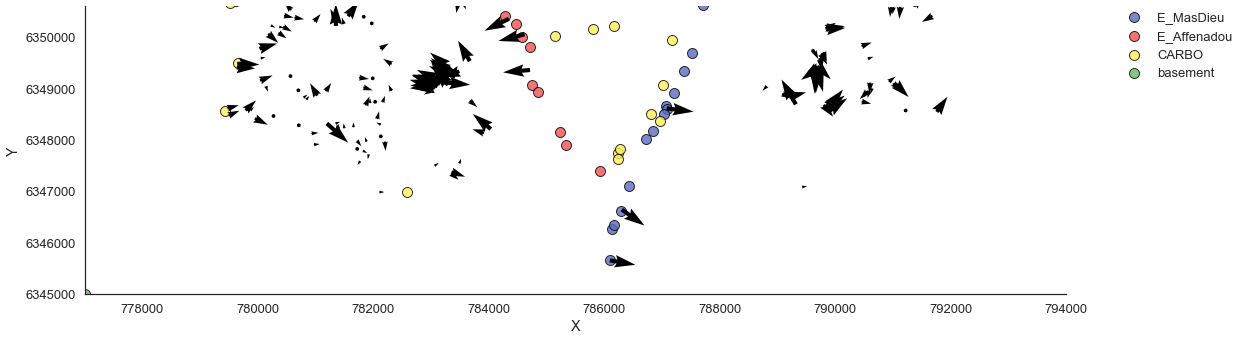

In [16]:
gp.plot_data(geo_data,direction='z')

In [17]:
#point filtering


In [18]:
interp_data = gp.InterpolatorData(geo_data, u_grade = [1,1], compile_theano=True, theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cpu
Precision:  float32
Number of faults:  2


In [19]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\elisa\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.733960221718462e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


C:\Users\elisa\Documents\git\gempy\gempy\gempy_front.py:892: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


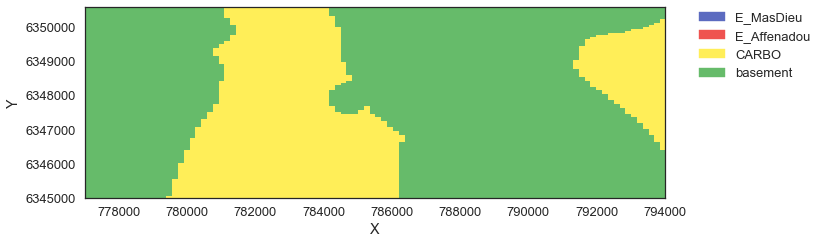

In [20]:
gp.plot_section(geo_data, lith_block[0], cell_number=76,  direction='z', plot_data=False)

C:\Users\elisa\Documents\git\gempy\gempy\gempy_front.py:892: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


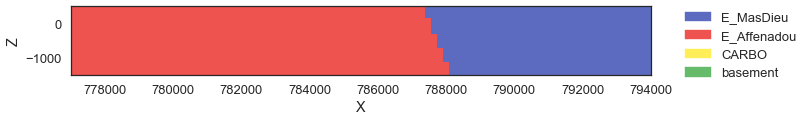

In [21]:
#meh?
gp.plot_section(geo_data, fault_block[0], cell_number=76,  direction='y', plot_data=False)